In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

1. Пусть Xt – марковский процесс с непрерывным временем, м.п.и. которого имеет вид Q. Найти м.в.п. вложенной цепи, моделировать Xt с помощью вложенной цепи.

In [30]:
Q=np.matrix([[-4,1,3],
  			 [2,-3,1],
  			 [3,2,-5]])
P=[[0,0,0],
	[0,0,0],
	[0,0,0]]

In [41]:
def trajectory(X,tau,x):
	for i in range(len(tau)):
		if x<tau[i]:
			return X[i]
	return 0

[[0, 0.25, 0.75], [0.6666666666666666, 0, 0.3333333333333333], [0.6, 0.4, 0]]
[0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 2]


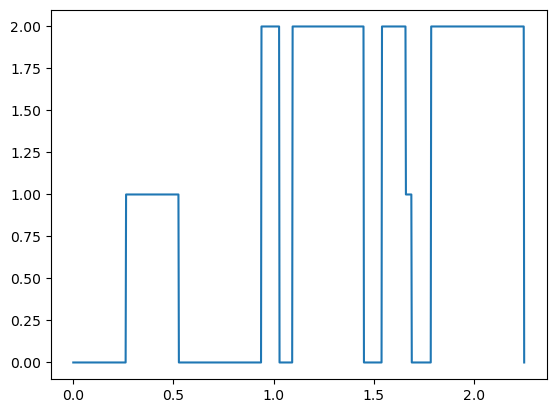

In [43]:
for i in range(3):
	for j in range(3):
		if i!=j:
			P[i][j]=-Q[i,j]/Q[i,i]
print(P)
trajectories=[]
X=[np.random.randint(3)]
for i in range(10):
	x=st.multinomial.rvs(n=1,p=P[X[i]])
	for i in range(3):
		if x[i]!=0:
			X.append(i)
print(X)
q=[-Q[i,i] for i in range(3)]
nu=st.expon.rvs(scale=1,size=11)
tau=[nu[0]/q[X[0]]]
for i in range(10):
	tau.append(nu[i]/q[X[i]]+tau[i])
x=np.linspace(0,tau[10],1000)
plt.plot(x,[trajectory(X,tau,i) for i in x])

2. Пусть Xt – марковский процесс с интенсивностью перехода i^2 из состояния i в i + 1. Моделировать процесс и построить его траекторию.

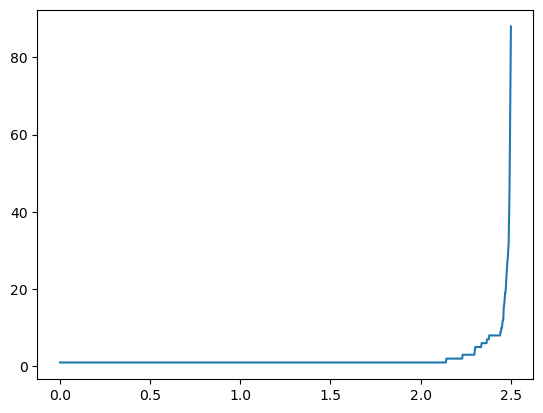

In [61]:
tau=[]
for i in range(100):
	tau.append(st.expon.rvs(size=1,scale=1/(i+1)**2))
	if i>0:
		tau[-1]+=tau[-2]
x=np.linspace(0,tau[99]*0.999,1000)
plt.plot(x,[trajectory(np.arange(99)+1,tau,i) for i in x])

3. В парикмахерскую с тремя парикмахерами приходят клиенты с интенсивностью λ, парикмахеры обслуживают клиентов с интенсивностью μ. Если все парикмахеры заняты, то клиент садится в очередь. Моделировать процесс при а) λ = 1, μ = 1, б) λ = 4, μ = 1.

In [87]:
def current_state(tofcoming,tofservice,t):
	curr_state=[0,0,0]
	end_time=[np.inf,np.inf,np.inf]
	queue=0
	customer=0
	curr_time=tofcoming[customer]
	why_change=-1
	j=0
	while curr_time<t:
		if why_change==-1:
			customer+=1
			if curr_state[0]==0:
				end_time[0]=curr_time+tofservice[j]
				j+=1
				curr_state[0]=1
			elif curr_state[1]==0:
				end_time[1]=curr_time+tofservice[j]
				j+=1
				curr_state[1]=1
			elif curr_state[2]==0:
				end_time[2]=curr_time+tofservice[j]
				j+=1
				curr_state[2]=1
			else:
				queue+=1
		if why_change==0:
			if queue==0:
				curr_state[0]=0
				end_time[0]=np.inf
			if queue!=0:
				end_time[0]=curr_time+tofservice[j]
				j+=1
				curr_state[0]=1
				queue-=1
		if why_change==1:
			if queue==0:
				curr_state[1]=0
				end_time[1]=np.inf
			if queue!=0:
				end_time[1]=curr_time+tofservice[j]
				j+=1
				curr_state[1]=1
				queue-=1
		if why_change==2:
			if queue==0:
				curr_state[2]=0
				end_time[2]=np.inf
			if queue!=0:
				end_time[2]=curr_time+tofservice[j]
				j+=1
				curr_state[2]=1
				queue-=1
		
		why_change=-1
		if customer<100:
			curr_time=tofcoming[customer]
			for i in range(3):
				if curr_time>end_time[i]:
					curr_time=end_time[i]
					why_change=i
		else:
			break
	return curr_state, queue

([1, 1, 1], 0)


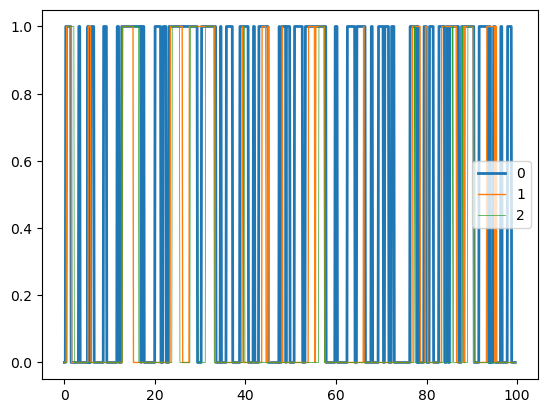

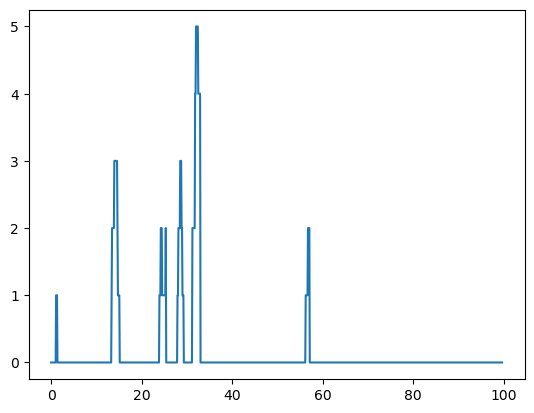

In [98]:
mu=1
l=1
tofcoming=st.expon.rvs(size=100,scale=1/l)
for i in range(1,100):
	tofcoming[i]+=tofcoming[i-1]
tofservice=st.expon.rvs(size=100,scale=1/mu)
x=np.linspace(0,tofcoming[99]*0.999,1000)
print(current_state(tofcoming,tofservice,1))
states=[[],[],[]]
queues=[]
for i in range(1000):
	state,queue=current_state(tofcoming,tofservice,x[i])
	states[0].append(state[0])
	states[1].append(state[1])
	states[2].append(state[2])
	queues.append(queue)
plt.plot(x,states[0],linewidth=2,label='0')
plt.plot(x,states[1],linewidth=1,label='1')
plt.plot(x,states[2],linewidth=0.5,label='2')
plt.legend()
plt.show()
plt.plot(x,queues)

([1, 0, 0], 0)


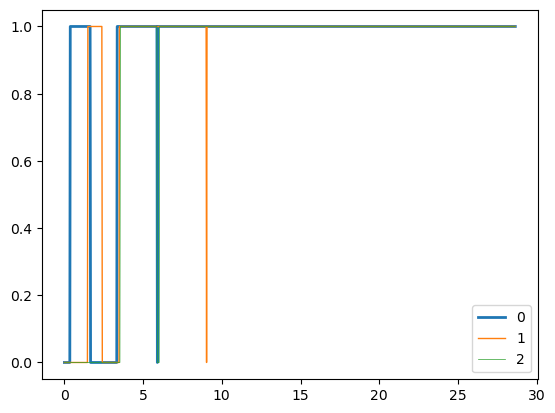

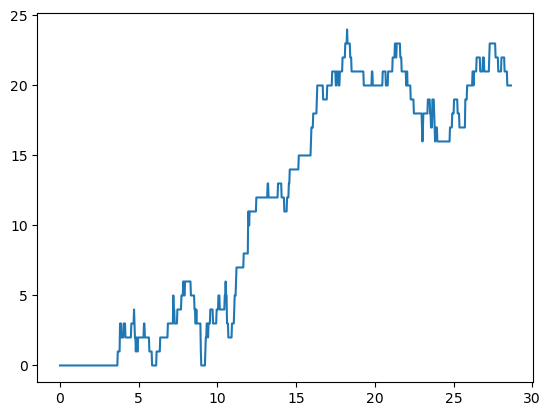

In [96]:
mu=1
l=4
tofcoming=st.expon.rvs(size=100,scale=1/l)
for i in range(1,100):
	tofcoming[i]+=tofcoming[i-1]
tofservice=st.expon.rvs(size=100,scale=1/mu)
x=np.linspace(0,tofcoming[99]*0.999,1000)
print(current_state(tofcoming,tofservice,1))
states=[[],[],[]]
queues=[]
for i in range(1000):
	state,queue=current_state(tofcoming,tofservice,x[i])
	states[0].append(state[0])
	states[1].append(state[1])
	states[2].append(state[2])
	queues.append(queue)
plt.plot(x,states[0],linewidth=2,label='0')
plt.plot(x,states[1],linewidth=1,label='1')
plt.plot(x,states[2],linewidth=0.5,label='2')
plt.legend()
plt.show()
plt.plot(x,queues)

4. Моделировать марковский процесс Xt с матрицей переходных интенсивностей Q. Найдем стационарное распределение Q и сравним его со стационарным распределением вложенной цепи. Для оценки стационарного распределения марковских цепей будем считать долю времени, проведенного цепью в каждом из состояний за длительное время.

In [2]:
def transformation(A):
	A=A.T
	n=int(A.size**0.5)
	for i in range(n):
		for j in range(n):
			if i==j:
				A[i,j]-=1
	C=A[0:n,1:n]
	b=-A[0:n,0]
	b=b.T
	b=np.array(b)
	return C,b,n

def grid_search(A,b,n):
	for i in range(n):
		C=np.matrix(np.delete(A,i,0))
		d=np.array(np.delete(b,i))
		try:
			X=np.linalg.solve(C,d)
			break
		except np.linalg.LinAlgError:
			continue
	X=np.concatenate((np.array([1]),X))
	return X/X.sum()

In [3]:
Q=np.matrix([[-5,1,3,1],
			 [1,-3,1,1],
			 [3,1,-5,1],
			 [1,1,1,-3]])
P=[[0,0,0,0],
   [0,0,0,0],
   [0,0,0,0],
   [0,0,0,0]]
#в состоянии i мы будем проводить в среднем nu/q_i, где nu~exp(1)
for i in range(4):
	for j in range(4):
		if i!=j:
			P[i][j]=-Q[i,j]/Q[i,i]

A=np.matrix(P)
print(A)
A,b,n=transformation(A)
print(grid_search(A,b,n))

[[0.         0.2        0.6        0.2       ]
 [0.33333333 0.         0.33333333 0.33333333]
 [0.6        0.2        0.         0.2       ]
 [0.33333333 0.33333333 0.33333333 0.        ]]
[0.3125 0.1875 0.3125 0.1875]


In [5]:
#[0.3125 0.1875 0.3125 0.1875] - стац. распределение вложенной цепи
q=[-Q[i,i] for i in range(4)]
x=np.random.randint(4)
time_in_i=np.zeros(4)
time_in_i[x]+=st.expon.rvs(size=1,scale=1/q[x])[0]
for i in range(10000):
	x=st.multinomial.rvs(n=1,p=P[x])
	for j in range(4):
		if x[j]!=0:
			x=j
			break
	time_in_i[x]+=st.expon.rvs(size=1,scale=1/q[x])[0]
print(time_in_i/np.sum(time_in_i))

[0.24909045 0.24604056 0.25071624 0.25415274]
